# Flight Delay Prediction using Regression

IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msgno
from pathlib import Path
import os
%matplotlib inline

READING THE DATASET

In [ ]:
filepath="C:\\Users\\Omii\\Desktop\\DME_Project"

In [ ]:
filepath

'C:\\Users\\Omii\\Desktop\\DME_Project'

In [ ]:
filepath=filepath+'\\Data'

In [ ]:
filepath

'C:\\Users\\Omii\\Desktop\\DME_Project\\Data'

In [ ]:
os.chdir(filepath)

In [ ]:
os.getcwd()

'C:\\Users\\Omii\\Desktop\\DME_Project\\Data'

In [ ]:
df_flights=pd.DataFrame()

In [ ]:
prev_filepath=filepath

for x in os.listdir():
    
    if x == "weather":
        break
        
    
    filepath=prev_filepath
    filepath=filepath+"\\"+x
    os.chdir(filepath)
    for y in os.listdir():
        
        next_path=filepath+'\\'+y
        os.chdir(next_path)
        
        for z in os.listdir():
            
            next_next_path = next_path + "\\" + z
            os.chdir(next_next_path)
            
            for w in os.listdir():
                name=w.split(".")
                if name[1] == "csv":
                    df = pd.read_csv(w,low_memory=False)
                    df_flights=pd.concat([df_flights,df],ignore_index=True)
                    print("Reading{}".format(name[0]))
        

            
print("Done")

ReadingOn_Time_On_Time_Performance_2016_1
ReadingOn_Time_On_Time_Performance_2016_10
ReadingOn_Time_On_Time_Performance_2016_11
ReadingOn_Time_On_Time_Performance_2016_12
ReadingOn_Time_On_Time_Performance_2016_2
ReadingOn_Time_On_Time_Performance_2016_3
ReadingOn_Time_On_Time_Performance_2016_4
ReadingOn_Time_On_Time_Performance_2016_5
ReadingOn_Time_On_Time_Performance_2016_6
ReadingOn_Time_On_Time_Performance_2016_7
ReadingOn_Time_On_Time_Performance_2016_8
ReadingOn_Time_On_Time_Performance_2016_9
ReadingOn_Time_On_Time_Performance_2017_1
ReadingOn_Time_On_Time_Performance_2017_10
ReadingOn_Time_On_Time_Performance_2017_11
ReadingOn_Time_On_Time_Performance_2017_12
ReadingOn_Time_On_Time_Performance_2017_2
ReadingOn_Time_On_Time_Performance_2017_3
ReadingOn_Time_On_Time_Performance_2017_4
ReadingOn_Time_On_Time_Performance_2017_5
ReadingOn_Time_On_Time_Performance_2017_6
ReadingOn_Time_On_Time_Performance_2017_7
ReadingOn_Time_On_Time_Performance_2017_8
ReadingOn_Time_On_Time_Perfo

In [ ]:
df_flights

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292274,2017,3,9,25,1,2017-09-25,B6,20409,B6,N216JB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11292275,2017,3,9,25,1,2017-09-25,B6,20409,B6,N651JB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11292276,2017,3,9,25,1,2017-09-25,B6,20409,B6,N265JB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11292277,2017,3,9,25,1,2017-09-25,B6,20409,B6,N298JB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_flights["FlightDate"]=pd.to_datetime(df_flights["FlightDate"])

In [ ]:
df_flights.sort_values(by="FlightDate",inplace=True)

In [ ]:
predictor_columns=["Origin","Dest","FlightDate","DepTime","DepDel15","CRSDepTime","CRSArrTime","DepDelayMinutes","OriginAirportID","DestAirportID","ArrTime","ArrDel15","ArrDelayMinutes"]

In [ ]:
df_flights=df_flights[predictor_columns]

In [ ]:
df_flights

,Origin,Dest,FlightDate,DepTime,DepDel15,CRSDepTime,CRSArrTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrTime,ArrDel15,ArrDelayMinutes
42830,LGA,CLT,2016-01-01,1005.0,0.0,1006,1224,0.0,12953,11057,1207.0,0.0,0.0
356641,FAI,SEA,2016-01-01,106.0,0.0,115,555,0.0,11630,14747,600.0,0.0,5.0
356640,SEA,FAI,2016-01-01,2314.0,0.0,2320,221,0.0,14747,11630,130.0,0.0,0.0
356639,FAI,SEA,2016-01-01,625.0,0.0,630,1110,0.0,11630,14747,1127.0,1.0,17.0
356638,FAI,SEA,2016-01-01,1938.0,1.0,1745,2230,113.0,11630,14747,25.0,1.0,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7074735,DFW,MCI,2017-12-31,1436.0,1.0,1255,1431,101.0,11298,13198,1746.0,1.0,195.0
7350164,AUS,CLT,2017-12-31,654.0,0.0,659,1040,0.0,10423,11057,1037.0,0.0,0.0
7350195,CLT,LGA,2017-12-31,1131.0,0.0,1135,1330,0.0,11057,12953,1310.0,0.0,0.0
7231984,LIH,HNL,2017-12-31,1340.0,0.0,1335,1420,5.0,12982,12173,1420.0,0.0,0.0


In [ ]:
df_flights["Month"]=df_flights["FlightDate"].dt.month

C:\Users\Omii\AppData\Local\Temp\ipykernel_22280\3905953106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flights["Month"]=df_flights["FlightDate"].dt.month


In [ ]:
df_flights

,Origin,Dest,FlightDate,DepTime,DepDel15,CRSDepTime,CRSArrTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrTime,ArrDel15,ArrDelayMinutes,Month
42830,LGA,CLT,2016-01-01,1005.0,0.0,1006,1224,0.0,12953,11057,1207.0,0.0,0.0,1
356641,FAI,SEA,2016-01-01,106.0,0.0,115,555,0.0,11630,14747,600.0,0.0,5.0,1
356640,SEA,FAI,2016-01-01,2314.0,0.0,2320,221,0.0,14747,11630,130.0,0.0,0.0,1
356639,FAI,SEA,2016-01-01,625.0,0.0,630,1110,0.0,11630,14747,1127.0,1.0,17.0,1
356638,FAI,SEA,2016-01-01,1938.0,1.0,1745,2230,113.0,11630,14747,25.0,1.0,115.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7074735,DFW,MCI,2017-12-31,1436.0,1.0,1255,1431,101.0,11298,13198,1746.0,1.0,195.0,12
7350164,AUS,CLT,2017-12-31,654.0,0.0,659,1040,0.0,10423,11057,1037.0,0.0,0.0,12
7350195,CLT,LGA,2017-12-31,1131.0,0.0,1135,1330,0.0,11057,12953,1310.0,0.0,0.0,12
7231984,LIH,HNL,2017-12-31,1340.0,0.0,1335,1420,5.0,12982,12173,1420.0,0.0,0.0,12


In [ ]:
df_flights.shape

(11292279, 14)

<AxesSubplot:>

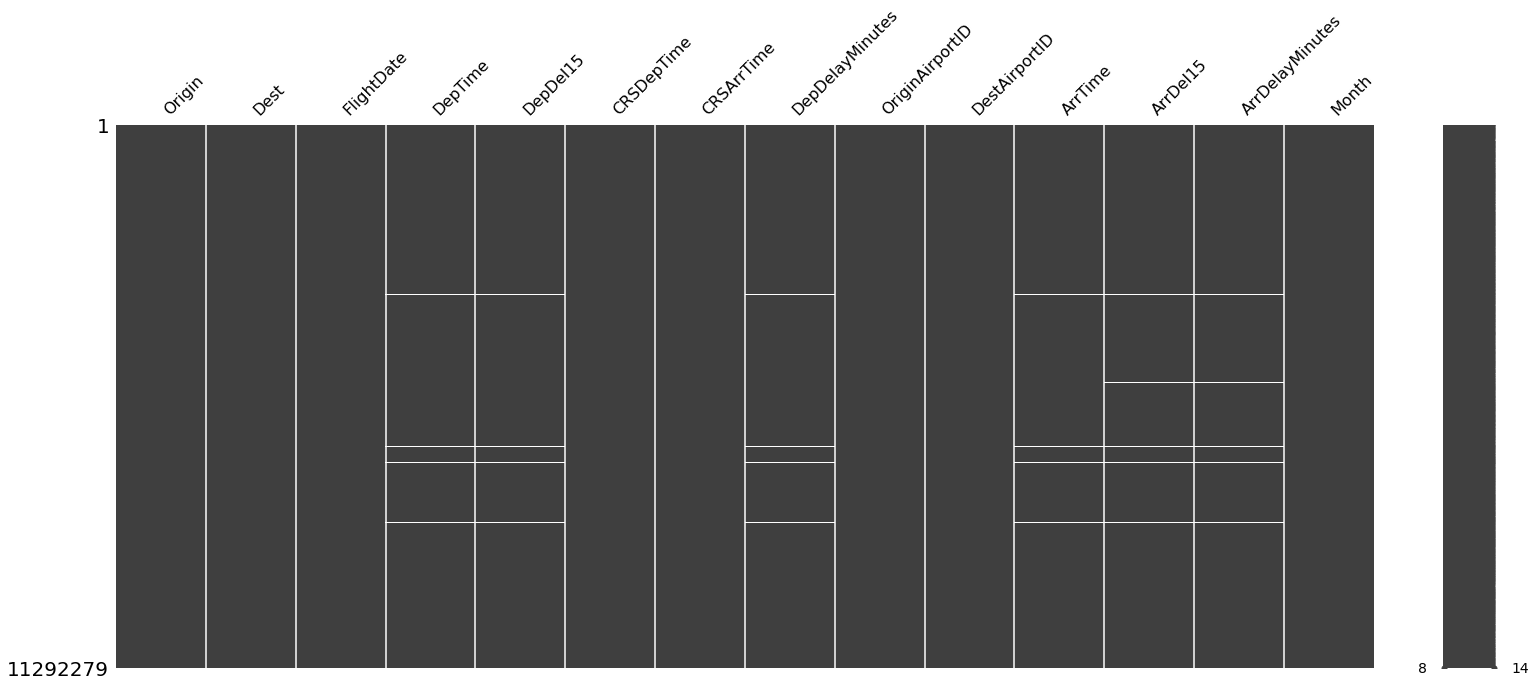

In [ ]:
msgno.matrix(df_flights)

In [ ]:
df_flights.columns

Index(['Origin', 'Dest', 'FlightDate', 'DepTime', 'DepDel15', 'CRSDepTime',
       'CRSArrTime', 'DepDelayMinutes', 'OriginAirportID', 'DestAirportID',
       'ArrTime', 'ArrDel15', 'ArrDelayMinutes', 'Month'],
      dtype='object')

In [ ]:
df_flights.isnull().sum()

Origin                  0
Dest                    0
FlightDate              0
DepTime            143764
DepDel15           143799
CRSDepTime              0
CRSArrTime              0
DepDelayMinutes    143799
OriginAirportID         0
DestAirportID           0
ArrTime            152518
ArrDel15           174724
ArrDelayMinutes    174724
Month                   0
dtype: int64

In [ ]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11292279 entries, 42830 to 7194062
Data columns (total 14 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Origin           object        
 1   Dest             object        
 2   FlightDate       datetime64[ns]
 3   DepTime          float64       
 4   DepDel15         float64       
 5   CRSDepTime       int64         
 6   CRSArrTime       int64         
 7   DepDelayMinutes  float64       
 8   OriginAirportID  int64         
 9   DestAirportID    int64         
 10  ArrTime          float64       
 11  ArrDel15         float64       
 12  ArrDelayMinutes  float64       
 13  Month            int64         
dtypes: datetime64[ns](1), float64(6), int64(5), object(2)
memory usage: 1.3+ GB


In [ ]:
df_flights.describe()

,DepTime,DepDel15,CRSDepTime,CRSArrTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrTime,ArrDel15,ArrDelayMinutes,Month
count,1.114852e+07,1.114848e+07,1.129228e+07,1.129228e+07,1.114848e+07,1.129228e+07,1.129228e+07,1.113976e+07,1.111756e+07,1.111756e+07,1.129228e+07
mean,1.333673e+03,1.764714e-01,1.330484e+03,1.490059e+03,1.235239e+01,1.269197e+04,1.269187e+04,1.470220e+03,1.793302e-01,1.234313e+01,6.541104e+00
std,5.034601e+02,3.812208e-01,4.902650e+02,5.176603e+02,4.082488e+01,1.534238e+03,1.534202e+03,5.365481e+02,3.836286e-01,4.042944e+01,3.396582e+00
min,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.013500e+04,1.013500e+04,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,9.160000e+02,0.000000e+00,9.150000e+02,1.104000e+03,0.000000e+00,1.129200e+04,1.129200e+04,1.051000e+03,0.000000e+00,0.000000e+00,4.000000e+00
50%,1.328000e+03,0.000000e+00,1.325000e+03,1.520000e+03,0.000000e+00,1.289200e+04,1.289200e+04,1.510000e+03,0.000000e+00,0.000000e+00,7.000000e+00
75%,1.743000e+03,0.000000e+00,1.735000e+03,1.920000e+03,6.000000e+00,1.405700e+04,1.405700e+04,1.918000e+03,0.000000e+00,7.000000e+00,9.000000e+00
max,2.400000e+03,1.000000e+00,2.359000e+03,2.400000e+03,2.755000e+03,1.621800e+04,1.621800e+04,2.400000e+03,1.000000e+00,2.189000e+03,1.200000e+01


In [ ]:
df_flights.dropna(axis=0,how="any",inplace=True)

C:\Users\Omii\AppData\Local\Temp\ipykernel_22280\618763657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flights.dropna(axis=0,how="any",inplace=True)


<AxesSubplot:>

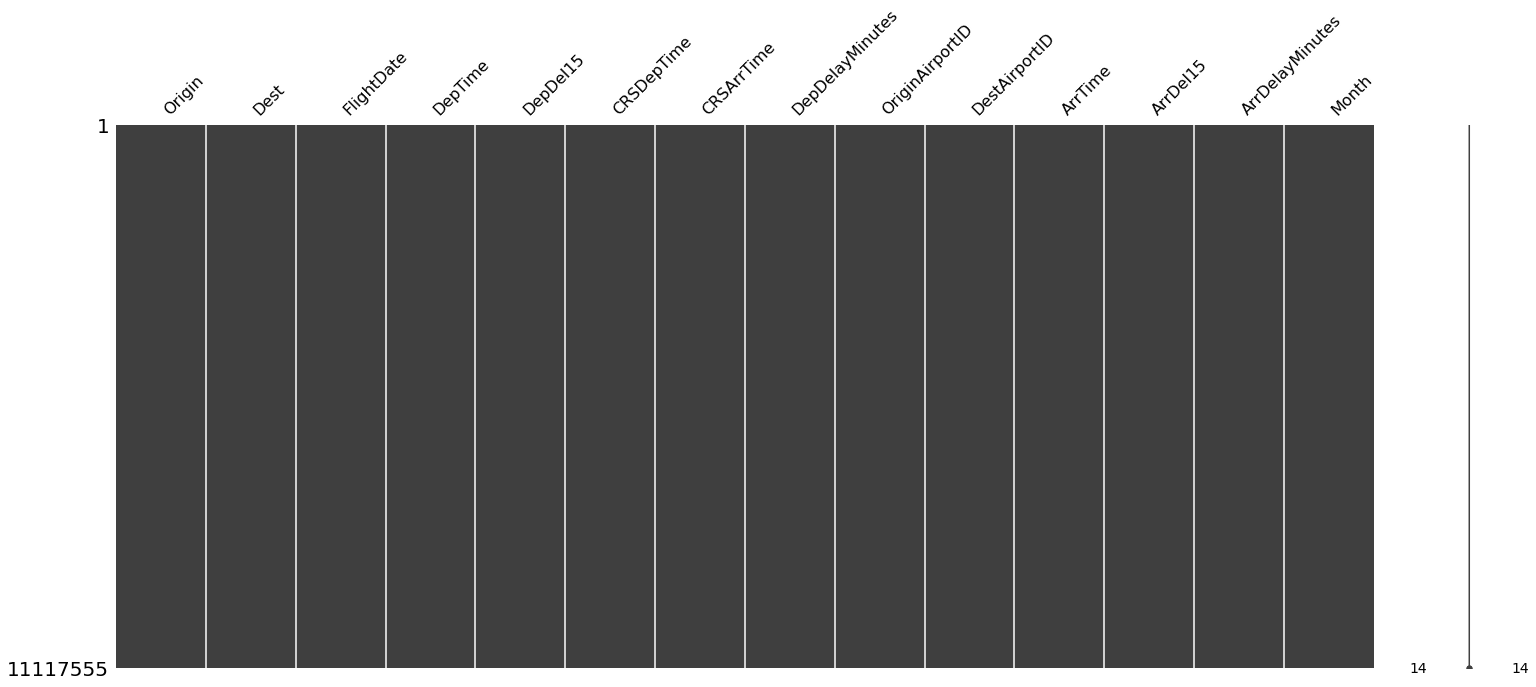

In [ ]:
msgno.matrix(df_flights)

In [ ]:
df_flights["Origin"].unique()

array(['LGA', 'FAI', 'SEA', 'ANC', 'LAS', 'CLT', 'HNL', 'LAX', 'EWR',
       'IAH', 'MCO', 'BNA', 'PDX', 'SFO', 'AUS', 'OMA', 'ORD', 'DEN',
       'SJC', 'OME', 'RSW', 'OTZ', 'SAN', 'JNU', 'KTN', 'SCC', 'BRW',
       'BET', 'MSP', 'FLL', 'SMF', 'BOS', 'PHL', 'SIT', 'PSG', 'WRG',
       'DFW', 'STT', 'PBI', 'TPA', 'SLC', 'SNA', 'PSP', 'ONT', 'KOA',
       'MSY', 'CMH', 'OAK', 'JAC', 'SRQ', 'DCA', 'SJU', 'OGG', 'CLE',
       'MIA', 'STL', 'JFK', 'ABQ', 'LIH', 'DTW', 'PHX', 'ITO', 'SAT',
       'BWI', 'ATL', 'IAD', 'PIT', 'DSM', 'HDN', 'MSN', 'BOI', 'OKC',
       'ALB', 'RDU', 'GEG', 'ORF', 'BTV', 'MCI', 'TUS', 'BLI', 'BQN',
       'BUR', 'CHS', 'DAL', 'IND', 'DAY', 'ECP', 'HOU', 'ISP', 'JAX',
       'HRL', 'ICT', 'ELP', 'GSP', 'GRR', 'FNT', 'BDL', 'BHM', 'AMA',
       'CAK', 'CRP', 'IMT', 'MQT', 'BRD', 'INL', 'PIH', 'SGU', 'TWF',
       'PLN', 'HIB', 'ESC', 'ITH', 'LWS', 'GTF', 'CIU', 'ABR', 'RHI',
       'HYS', 'SBP', 'DLH', 'PSC', 'MKE', 'BJI', 'CPR', 'BTM', 'GJT',
       'CDC', 'COD',

In [ ]:
airports=["ATL","CTL","DEN","DFW","EWR","IAH","JFK","LAX","LAS","MCO","MIA","ORD","PHX","SEA","SFO"]

In [ ]:
df_flights=df_flights[df_flights["Origin"].isin(airports) | df_flights["Dest"].isin(airports)]

In [ ]:
df_flights=df_flights.reset_index(drop=True)

In [ ]:
os.chdir("C:\\Users\\Omii\\Desktop\\DME_Project")

In [ ]:
df_flights.to_csv("main_flights_csv")